# method 方法 

## PARAMETERIZED DIFFERENTIAL OPERATORS 参数化差分算子 

We present a novel scheme for efficiently performing convolutions on manifolds approximated by
a given underlying mesh, using what we call Parameterized Differential Operators. To this end, we
reparameterize the learnable convolution kernel as a linear combination of differential operators.
Such reparameterization provides two distinct advantages: first, we can **drastically** reduce the number
of parameters per given convolution kernel, allowing for an efficient and lean learning space;
second, as opposed to the **cross-correlation** type convolution on mesh surfaces (Masci et al., 2015),
which requires large amounts of **geodesic computations**and **interpolations**, first and second order
differential operators can be efficiently estimated using only the one-ring neighborhood.

drastically  大幅地

cross-correlation 互相关

geodesic computations 测地计算

interpolation 插值

我们提出了一种新方案，使用我们称之为**参数化微分算子**的方法，有效地对由给定底层网格近似的流形进行卷积。

为此，我们将可学习卷积核重新参数化为差分算子的线性组合。

这种重新参数化提供了两个明显的优点

*首先，我们可以大大减少每个给定卷积核的参数数量，从而实现高效，精益的学习空间;*

*其次，与网格表面上的互相关类型卷积（Masci等人，2015）相反（其需要大量的测地计算和插值），我们可以仅使用单环邻域来有效地估计一阶和二阶微分算子。*


In order to illustrate the concept of PDOs, we draw comparisons to the conventional 3*3 convolution
kernel in the regular grid domain. The 3 * 3 kernel parameterized by parameters θ: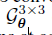 can be
written as a linear combination of basis kernels which can be viewed as delta functions at constant
offsets:

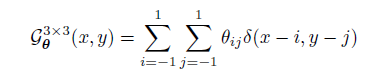
where x and y refer to the **spatial coordinates** that correspond to the two spatial dimensions over
which the convolution is performed. Due to the linearity of the cross-correlation operator (*), the
output feature map can be expressed as a linear combination of the input function cross-correlated
with different basis functions. Defining the linear operator 🔺ij to be the cross-correlation with a
basis delta function, we have:

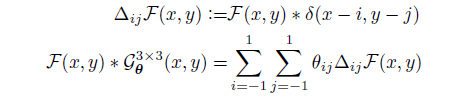

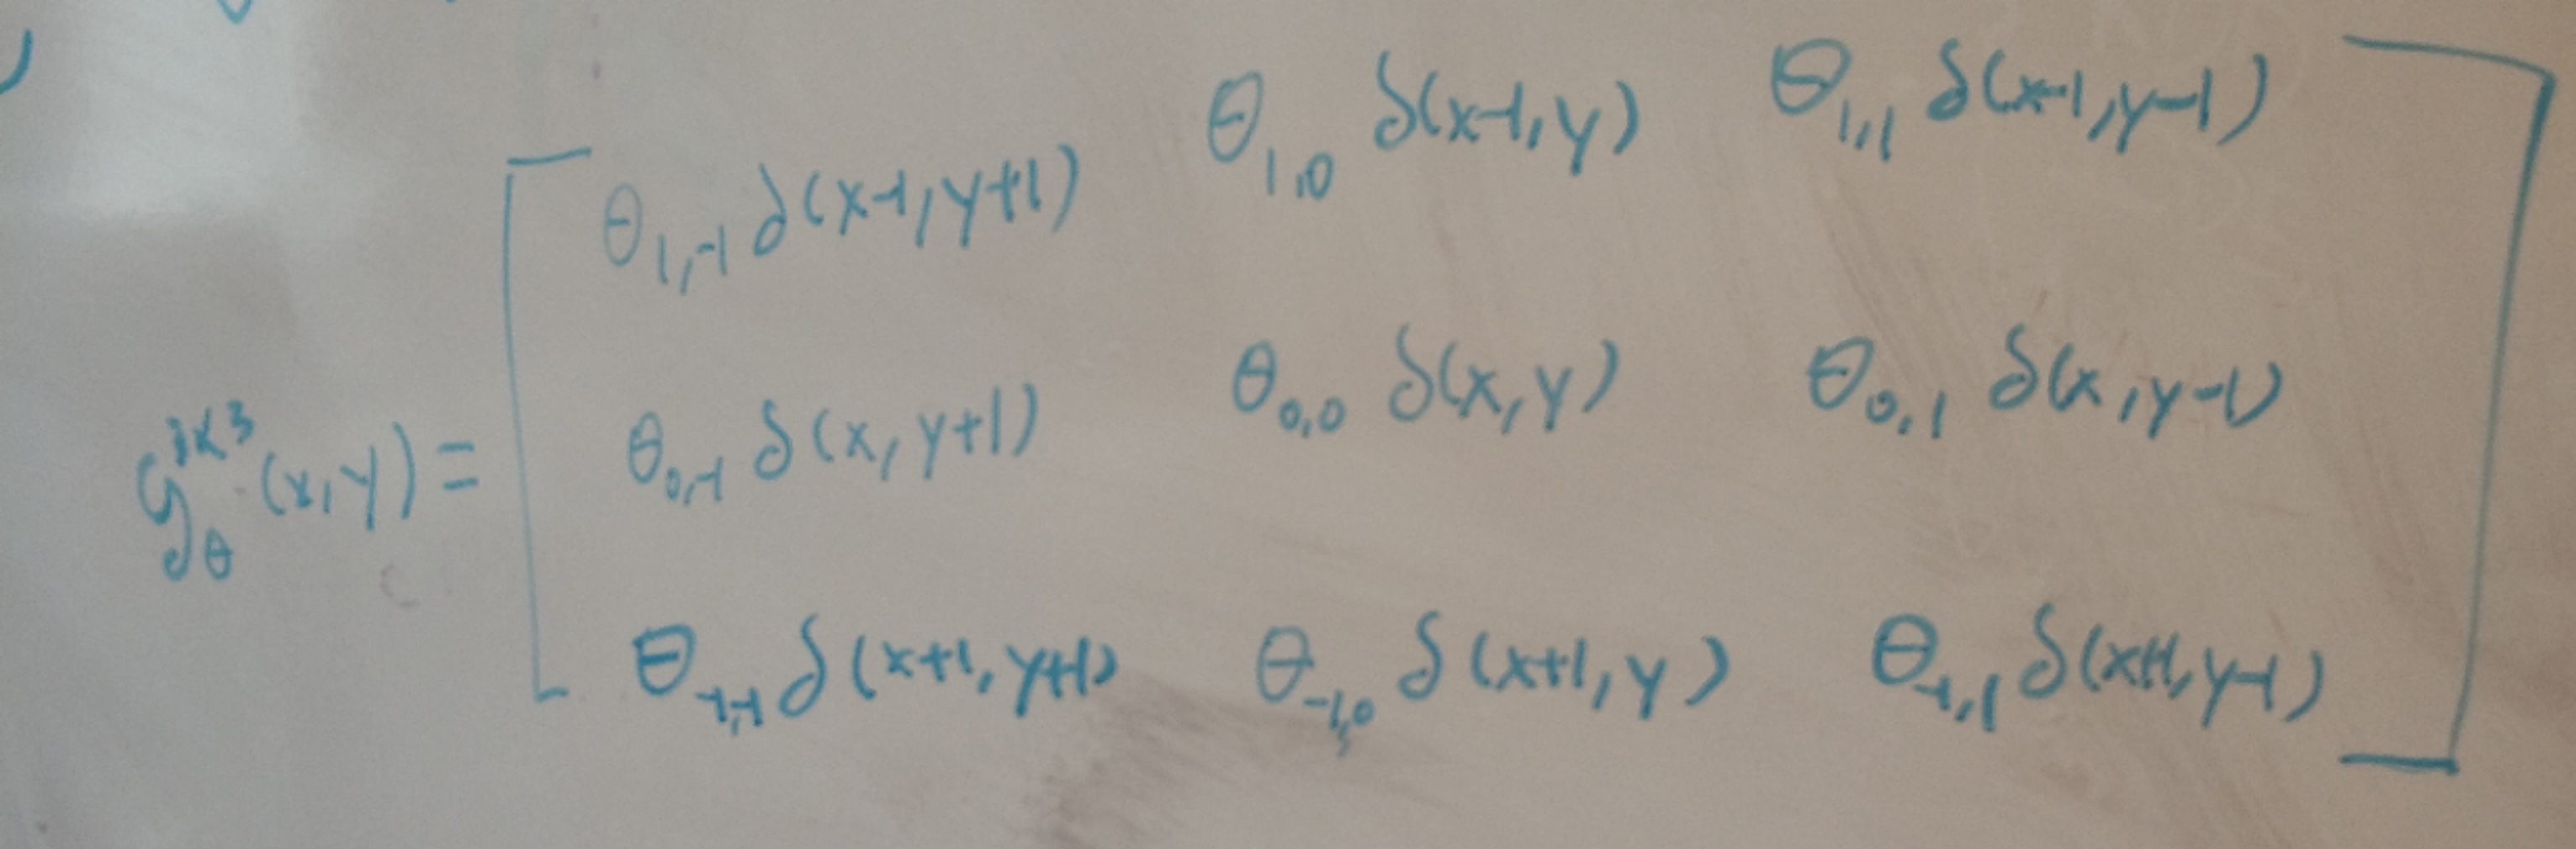

spatial coordinates 空间坐标

为了说明PDO的概念，我们在常规网格域中完成了与传统3 * 3卷积内核的比较。

由参数θ 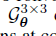参数化的3 * 3 

内核可以写成基础内核的线性组合，可以在恒定偏移量下视为delta函数：
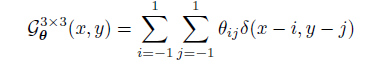

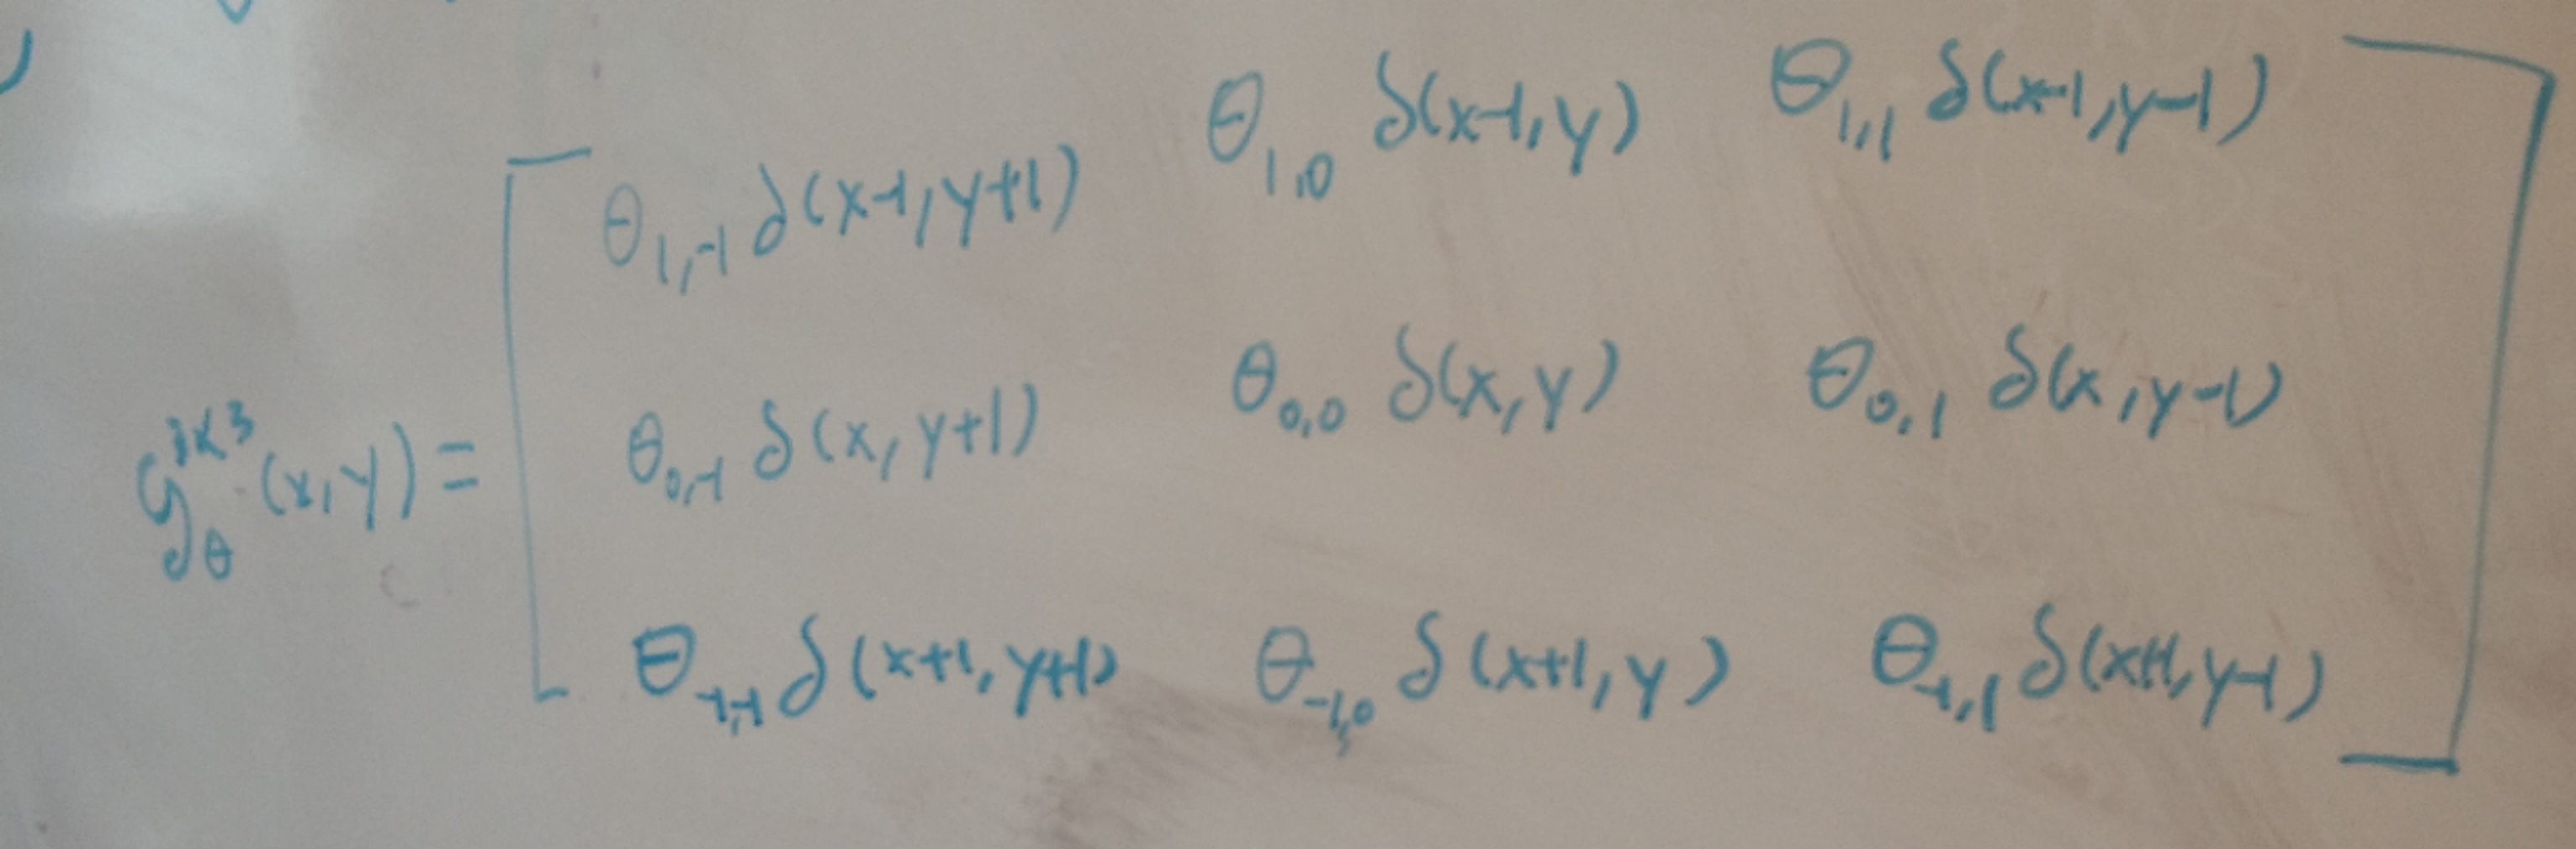

其中x和y指的是对应于执行卷积的两个空间维度的空间坐标。

由于互相关算子（*）的线性，输出特征图可以表示为与不同基函数互相关的输入函数的线性组合。

将线性算子🔺ij定义为与基本delta函数的互相关，我们得到：

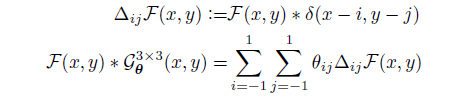

上面是传统的

下面是本篇论文的

In our formulation of PDOs, we replace the cross-correlation linear operators 🔺ij with differential
operators of varying orders. Similar to the linear operators resulting from cross-correlation with
basis functions, differential operators are linear, and approximate local features. In contrast to crosscorrelations
on manifolds, differential operators on meshes can be efficiently computed using **Finite
Element basis**, or derived by **Discrete Exterior Calculus**. In the actual implementation below, we
choose the identity (I, 0th order differential, same as 🔺00), derivatives in two orthogonal spatial
dimensions (▽x;▽y, 1st order differential), and the Laplacian operator (▽2, 2nd order differential):
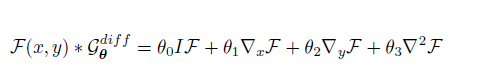


Finite Element basis 有限元基础

 Discrete Exterior Calculus 离散外部微积分

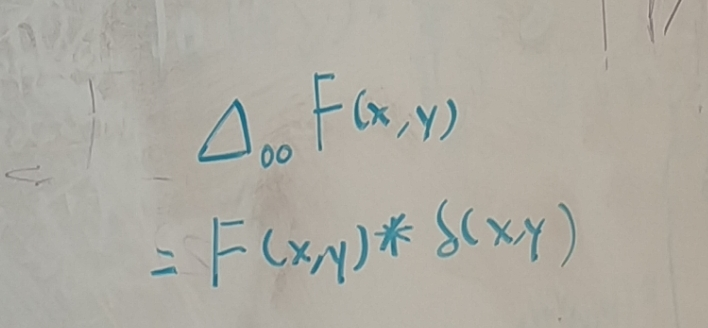

在我们的PDO公式中，我们用不同阶数的微分算子代替互相关线性算子🔺ij。

与基函数互相关产生的线性算子类似，微分算子是线性的，他们两个的局部特征类似。

与流形上的交叉相关相反，网格上的微分算子可以使用有限元基础有效地计算，或者通过离散外部微积分导出。

在下面的实际实现中，我们选择特征（I，0阶微分，相同于🔺00），两个正交空间维度中的导数（▽x;▽y，一阶微分）和拉普拉斯算子（▽2，二阶微分）：
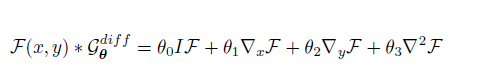

The identity (I) of the input function is **trivial** to obtain. The first derivative (▽x;▽y) can be obtained
by first computing the per-face gradients, and then using area-weighted average to obtain per-vertex
gradient. The dot product between the per-vertex gradient value and the corresponding x and y
vector fields are then computed to acquire ▽xF and ▽yF. For the sphere, we choose the eastwest
and north-south directions to be the x and y components, since the poles naturally orient the
spherical signal. The Laplacian operator on the mesh can be **discretized** using the **cotangent formula**:
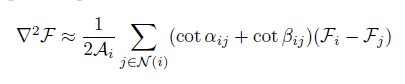

trivial 不重要的

 discretized 离散
 
cotangent formula: 余切公式

输入函数的标识（I）是微不足道的

通过首先计算每个面的梯度，然后使用面积加权平均来获得每顶点梯度，可以获得一阶导数（▽x;▽y）

然后计算每顶点梯度值与相应的x和y矢量场之间的点积，以获得▽xF和▽yF。

对于球体，我们选择东西和南北方向作为x和y分量，因为极点自然地定向球形信号。
网格上的拉普拉斯算子可以使用余切公式进行离散化：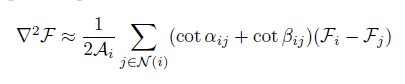

where N(i) is the nodes in the neighboring one-ring of i, Ai is the area of the dual face corresponding
to node i, and αij and βij are the two angles opposing edge ij. With this parameterization of the
convolution kernel, the parameters can be similarly optimized via backpropagation using standard
stochastic optimization routines.

其中N（i）是i的相邻单环中的节点，Ai是对应于节点i的双面的区域，并且αij和βij是与边缘ij相对的两个角度。

利用卷积核的这种参数化，可以使用标准随机优化例程通过反向传播类似地优化参数。